In [3]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
print(os.getcwd())

C:\Users\bazil


In [5]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.shape

(14999, 10)

In [9]:
# Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

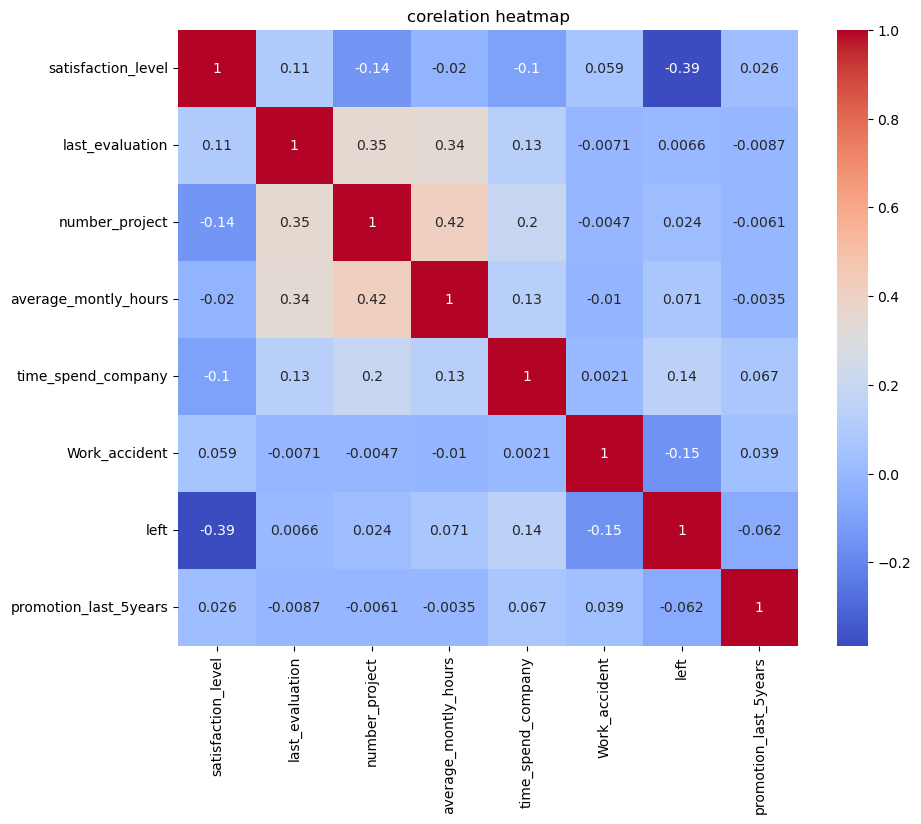

In [10]:
plt.figure(figsize=(10,8))

corr_matrix = data.select_dtypes(include='number').corr()

sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("corelation heatmap")
plt.show()



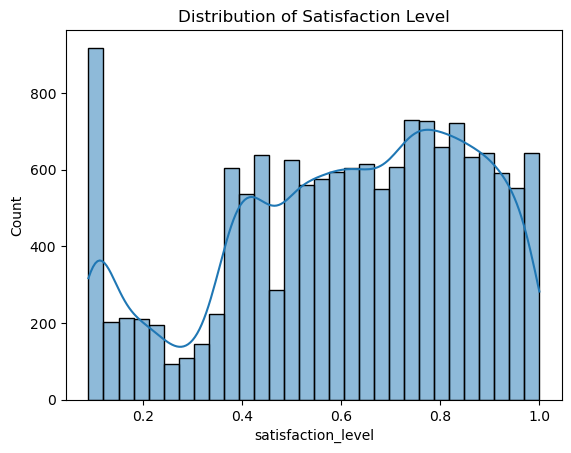

In [11]:
sns.histplot(data["satisfaction_level"], bins=30, kde=True)
plt.title("Distribution of Satisfaction Level")
plt.show()


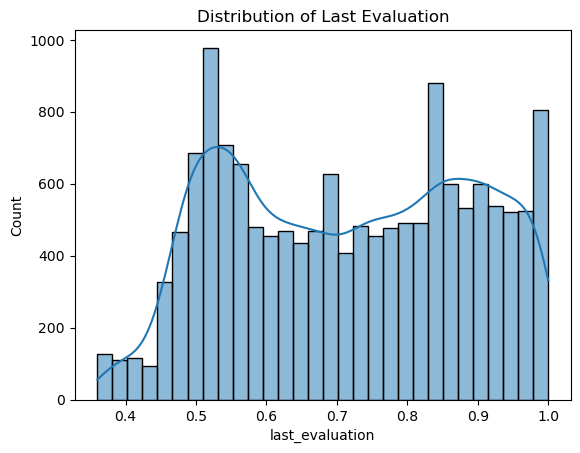

In [12]:
sns.histplot(data["last_evaluation"], bins=30, kde=True)
plt.title("Distribution of Last Evaluation")
plt.show()


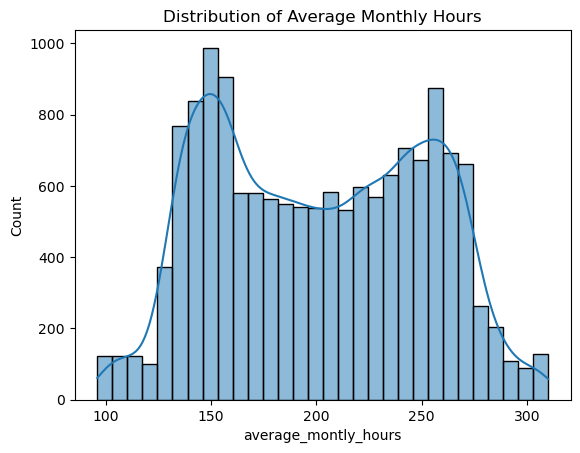

In [13]:
sns.histplot(data["average_montly_hours"], bins=30, kde=True)
plt.title("Distribution of Average Monthly Hours")
plt.show()


### Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_projectand hue column left), and give your inferences from the plot

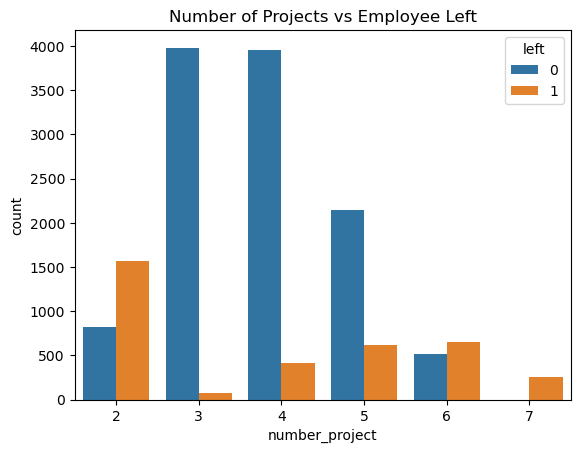

In [14]:
sns.countplot(x="number_project", data=data, hue="left")
plt.title("Number of Projects vs Employee Left")
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
left_data = data[data["left"] == 1]

In [17]:
x_left = left_data[["satisfaction_level","last_evaluation"]]
x_left.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_left)
left_data["Cluster"] = clusters
print(left_data["Cluster"].value_counts())

Cluster
0    1650
1     977
2     944
Name: count, dtype: int64


C:\Users\bazil\AppData\Local\Temp\ipykernel_14380\1845180950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_data["Cluster"] = clusters


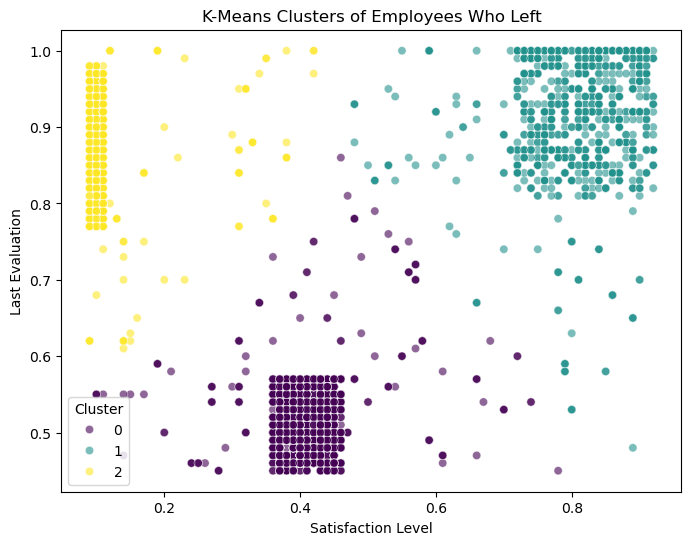

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=left_data,
    x="satisfaction_level",
    y="last_evaluation",
    hue="Cluster",
    palette="viridis",
    alpha=0.6
)
plt.title("K-Means Clusters of Employees Who Left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.show()


In [20]:
cluster_summary = left_data.groupby("Cluster")[["satisfaction_level", "last_evaluation"]].mean()
print(cluster_summary)

         satisfaction_level  last_evaluation
Cluster                                     
0                  0.410145         0.516982
1                  0.808516         0.911709
2                  0.111155         0.869301


###   Pre-process the data by converting categorical columns to numerical columns by :

Separating categorical variables and numeric variables                            
 Applying get_dummies() to the categorical variables                                      
 Combining categorical variables and numeric variables

In [21]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
# Separate features and target
x = data.drop("left", axis=1)
y = data["left"]

In [26]:
# Categorical columns
cat_cols = ["sales", "salary"]

In [28]:
num_cols = [col for col in x.columns if col not in cat_cols]

In [29]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [31]:
X_cat = pd.get_dummies(x[cat_cols], drop_first=True)

In [34]:
X_num = x[num_cols]

In [36]:
X_final = pd.concat([X_num, X_cat], axis=1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=123, stratify=y)

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(random_state=123)

In [44]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
print(y_train.value_counts())

left
0    9142
1    2857
Name: count, dtype: int64


In [48]:
print(pd.Series(y_train_smote).value_counts())

left
0    9142
1    9142
Name: count, dtype: int64


### STEP 5

In [49]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [50]:
# 5-Fold CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

### Logistic Regression – CV

In [52]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Cross-validation prediction
y_pred_logreg = cross_val_predict(logreg, X_train_smote, y_train_smote, cv=cv)

# Classification report
print(classification_report(y_train_smote, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



### Random Forest – CV

In [54]:
rf = RandomForestClassifier(random_state=123)

# Cross-validation prediction
y_pred_rf = cross_val_predict(rf, X_train_smote, y_train_smote, cv=cv)

print(classification_report(y_train_smote, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.97      0.98      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



### Gradient Boosting – CV

In [60]:
gb = GradientBoostingClassifier(random_state=123)

# Cross-validation prediction
y_pred_gb = cross_val_predict(gb, X_train_smote, y_train_smote, cv=cv)

print(classification_report(y_train_smote, y_pred_gb))


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



### Step 6 – Identify Best Model

6.1 Calculate ROC / AUC and Plot ROC Curve

In [61]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}


In [62]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [65]:
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)


In [66]:
y_prob = model.predict_proba(X_test)[:,1]

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print(f"{name} AUC: {auc:.4f}")

Gradient Boosting AUC: 0.9859


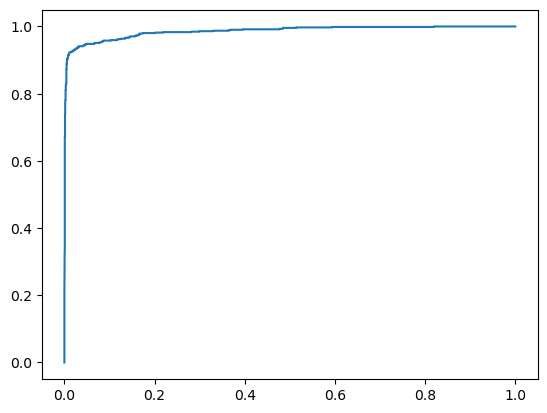

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

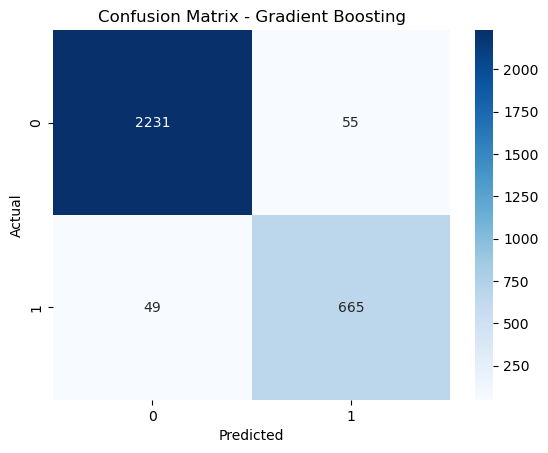

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [78]:
# Classification Report
print(f"Classification Report for {name}")
print(classification_report(y_test, y_pred))
print("-"*50)

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2286
           1       0.92      0.93      0.93       714

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000

--------------------------------------------------


C:\Users\bazil\AppData\Local\Temp\ipykernel_14380\1551927300.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


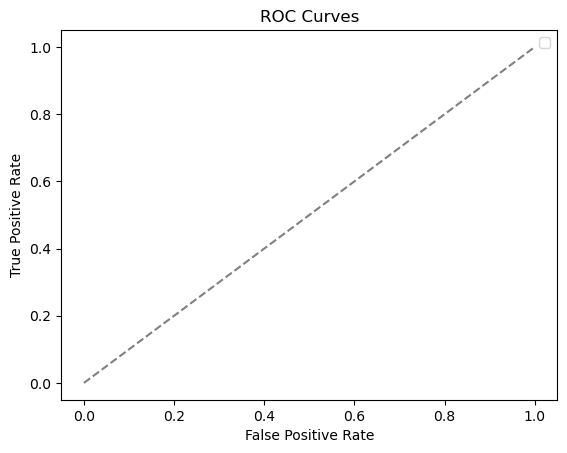

In [82]:
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves")
plt.show()

### STEP 7

In [84]:
# Import library
import pandas as pd

# Fit best model
best_model = GradientBoostingClassifier(random_state=123)
best_model.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_pred_prob = best_model.predict_proba(X_test)[:,1]

# Create DataFrame
prob_df = pd.DataFrame({
    "Probability_of_Leaving": y_pred_prob
})

# Display few rows
print(prob_df.head())


   Probability_of_Leaving
0                0.006628
1                0.947957
2                0.086492
3                0.017452
4                0.027727


In [85]:
# Define bins
bins = [-0.01, 0.20, 0.60, 0.90, 1.0]
labels = ["Safe Zone (Green)", 
          "Low-Risk Zone (Yellow)", 
          "Medium-Risk Zone (Orange)", 
          "High-Risk Zone (Red)"]

# Create zone column
prob_df["Risk_Zone"] = pd.cut(
    prob_df["Probability_of_Leaving"],
    bins=bins,
    labels=labels
)

# Check counts per zone
zone_counts = prob_df["Risk_Zone"].value_counts()
print(zone_counts)


Risk_Zone
Safe Zone (Green)            2094
High-Risk Zone (Red)          619
Low-Risk Zone (Yellow)        208
Medium-Risk Zone (Orange)      79
Name: count, dtype: int64


In [86]:
# Combine predictions with test data if you want details
output_df = X_test.copy()
output_df["Actual_Left"] = y_test.values
output_df["Predicted_Probability"] = y_pred_prob
output_df["Risk_Zone"] = prob_df["Risk_Zone"].values

# View few rows
print(output_df.head())


       satisfaction_level  last_evaluation  number_project  \
10627                0.98             0.77               3   
2703                 0.76             0.93               3   
6059                 0.70             0.93               3   
3258                 0.48             0.61               3   
4565                 0.57             0.90               3   

       average_montly_hours  time_spend_company  Work_accident  \
10627                   191                   2              0   
2703                    271                   5              0   
6059                    185                   4              0   
3258                    223                   3              1   
4565                    144                   2              0   

       promotion_last_5years  sales_RandD  sales_accounting  sales_hr  ...  \
10627                      0        False             False     False  ...   
2703                       0        False             False      True  ...

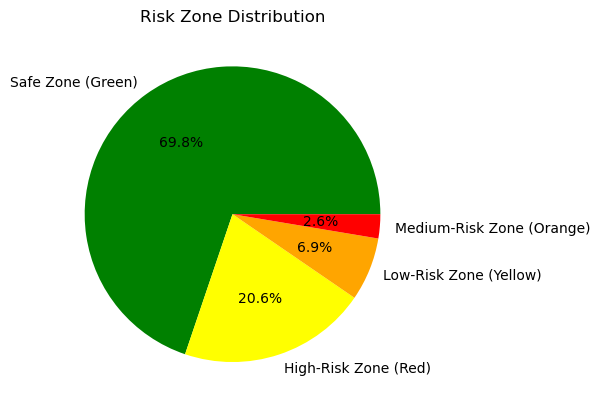

In [87]:
import matplotlib.pyplot as plt

zone_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green','yellow','orange','red'])
plt.title("Risk Zone Distribution")
plt.ylabel("")
plt.show()
